1. IMPORTACIÓN DE LIBRERÍAS

In [198]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns

2. INICIALIZACIÓN DE VARIABLES

In [199]:
sistemas = []
dataset = []
df = None 

3. FUNCIÓN PARA GENERAR LOS HOSTNAMES

In [200]:
def set_hostnames(number_of_hosts: int) -> None:
    sistema_operativo = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    paises = ['NOR']*6 + ['FRA']*6 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 
    grupo_alpha=[] 
    
    for i in range(number_of_hosts): 
            pais = random.choice(paises)
            sistema = random.choice(sistema_operativo) + random.choice(entorno)
            sistema += pais
            grupo_alpha.append(sistema)
            sistema += str(grupo_alpha.count(sistema)).zfill(3) 
            sistemas.append(sistema)

4. FUNCIÓN PARA OBTENER EL NOMBRE DEL SISTEMA OPERATIVO

In [201]:
def get_os(hostname:str)-> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

5. FUNCIÓN PARA OBTENER EL NOMBRE DEL ENTORNO

In [202]:
def get_enviroment(hostname:str) -> str:
    if hostname[1].startswith('D'):
        return 'Development'
    elif hostname[1].startswith('I'):
        return 'Integration'
    elif hostname[1].startswith('T'):
        return 'Testing'
    elif hostname[1].startswith('S'):
        return 'Staging'
    elif hostname[1].startswith('P'):
        return 'Production'
    else:
        return 'Unknow'

6. FUNCIÓN PARA OBTENER EL NOMBRE DEL PAÍS

In [203]:
def get_country(hostname:str) -> str:
    if hostname[2:5].startswith('NOR'):
        return 'Norway'
    elif hostname[2:5].startswith('DEU'):
        return 'Germany'
    elif hostname[2:5].startswith('ITA'):
        return 'Italy'
    elif hostname[2:5].startswith('ESP'):
        return 'Spain'
    elif hostname[2:5].startswith('IRL'):
        return 'Ireland'
    elif hostname[2:5].startswith('FRA'):
        return 'France'
    else:
        return 'Unknow'

7. FUNCIÓN PARA GENERAR EL DATAFRAME

In [204]:
def set_dataframe(count:int) -> None:
    
    global df
    
    set_hostnames(count)
    
    for hostname in sistemas:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'enviroment': get_enviroment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-2:])
        })
        
    df = pd.DataFrame(dataset)

8. CREACIÓN DE DATAFRAME

In [205]:
set_dataframe(1500)

In [206]:
df

,hostname,os,enviroment,country,node
0,LTIRL001,Linux,Testing,Ireland,1
1,LPDEU001,Linux,Production,Germany,1
2,SIIRL001,Solaris,Integration,Ireland,1
3,LDIRL001,Linux,Development,Ireland,1
4,LDIRL002,Linux,Development,Ireland,2
...,...,...,...,...,...
1495,LPESP037,Linux,Production,Spain,37
1496,SPDEU036,Solaris,Production,Germany,36
1497,SPESP022,Solaris,Production,Spain,22
1498,SIIRL017,Solaris,Integration,Ireland,17


9. GUARDAR EL DATAFRAME GENERADO EN UN FICHERO CSV

In [207]:
df.to_csv(
    'host.csv',
    header=True,
    index=False
)

In [208]:
host_df = pd.read_csv('host.csv')
host_df

,hostname,os,enviroment,country,node
0,LTIRL001,Linux,Testing,Ireland,1
1,LPDEU001,Linux,Production,Germany,1
2,SIIRL001,Solaris,Integration,Ireland,1
3,LDIRL001,Linux,Development,Ireland,1
4,LDIRL002,Linux,Development,Ireland,2
...,...,...,...,...,...
1495,LPESP037,Linux,Production,Spain,37
1496,SPDEU036,Solaris,Production,Germany,36
1497,SPESP022,Solaris,Production,Spain,22
1498,SIIRL017,Solaris,Integration,Ireland,17


10. GENERAR UN ÚNICO GRÁFICO AGRUPANDO PARA CADA PAÍS LOS ENTORNOS

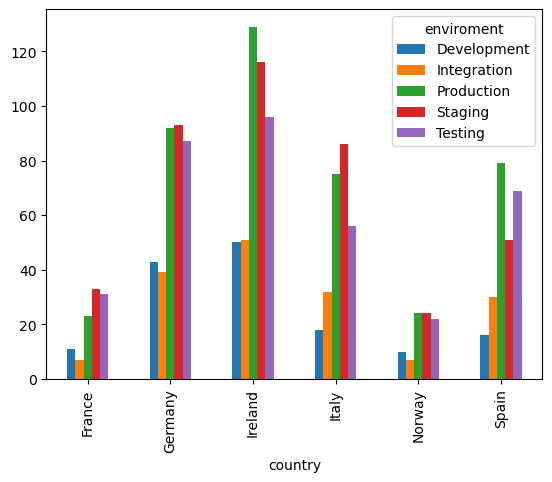

In [209]:
c = df
c_new = c.groupby( [c['country'], 'enviroment'] ).size().head(1500)
c_new.unstack().plot(kind='bar')
plt.show()

11. CREAR UNA FIGURA CON 4 GRÁFICOS EN UNA MALLA DE 2 FILAS Y 2 COLUMNAS

In [210]:
g = df['country'].value_counts()
g


Ireland    442
Germany    354
Italy      267
Spain      245
France     105
Norway      87
Name: country, dtype: int64

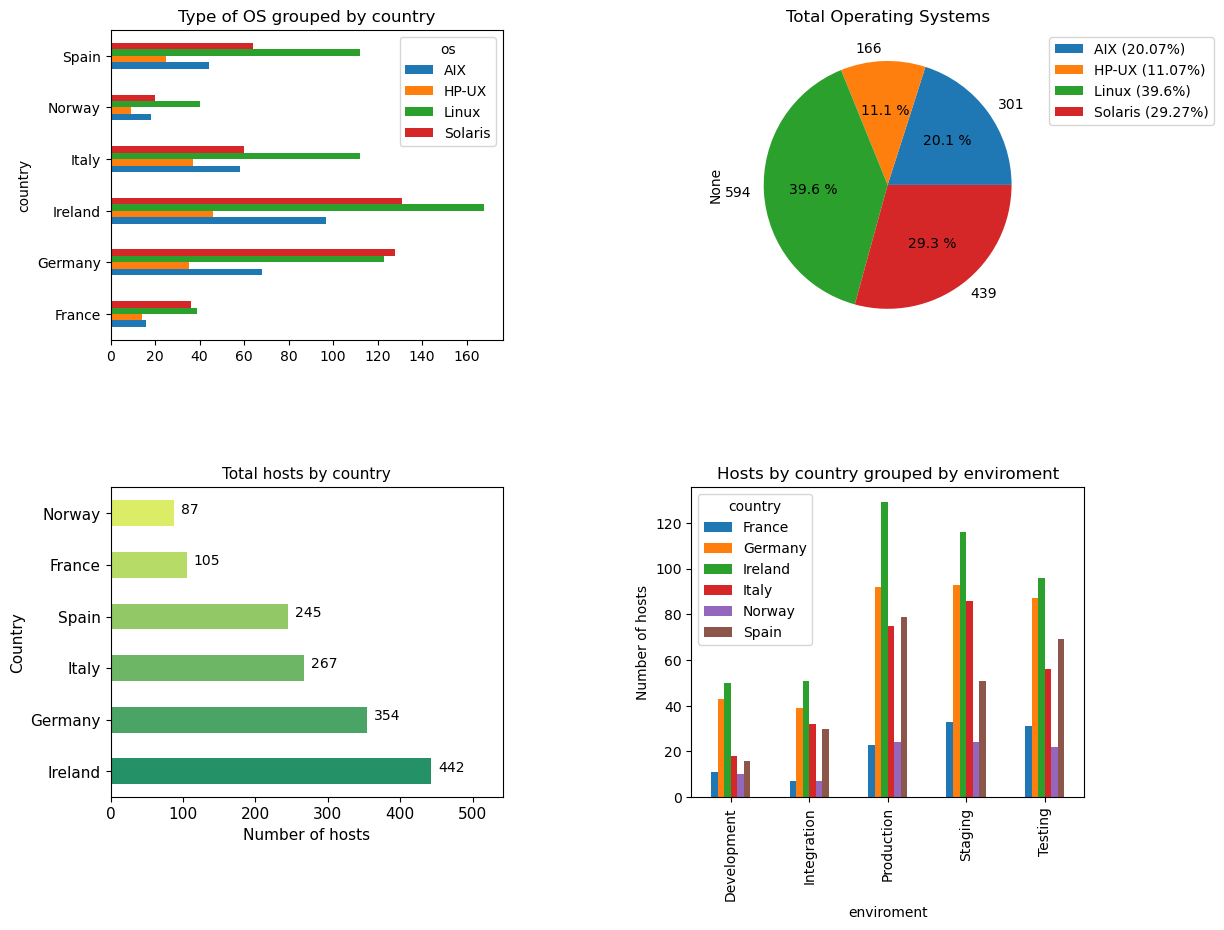

In [211]:
fig, axs = plt.subplots(2, 2)
#Gráfico barras horizontales 1
g1 = df.groupby( [df['country'], 'os'] ).size().head(1500)
g1.unstack().plot(kind='barh',ax = axs[0,0])
axs[0, 0].set_title('Type of OS grouped by country')

#Gráfico barras horizontales 2
g3 = df['country'].value_counts()
g_max=g3.max() + 100
g_color = sns.color_palette('summer',6)
valores= g3.plot.barh(ax=axs[1,0],fontsize=11,color=g_color)
indice=list(g3.index)
for indice,valores in enumerate(g3):
    axs[1, 0].text(valores + 10, indice, int(valores), fontweight='8')
axs[1, 0].set_title('Total hosts by country', fontsize=11)
axs[1, 0].set_xlim(0,g_max)   
axs[1, 0].set_ylabel(ylabel='Country', fontsize=11)
axs[1, 0].set_xlabel('Number of hosts',fontsize=11)

#Gráfico barras verticales
g4 = df.groupby( [df['country'], 'enviroment'] ).size().head(1500)
g4.unstack(0).plot(kind='bar',ax = axs[1,1])
axs[1, 1].set_title('Hosts by country grouped by enviroment')
axs[1, 1].set_ylabel('Number of hosts')
#

#Gráfico circular
g2 = df.groupby(df['os'] ).size().head(1500)
indice=['Linux','AIX','Solaris','HP-UX']
valores=g2.plot(kind='pie',ax = axs[0,1],autopct="%0.1f %%",labels=g2)
legend = [f'{x} ({round(y,2)}%)' for x,y in zip(g2.index,g2/g2.sum()*100)]
axs[0, 1].set_title('Total Operating Systems')
axs[0,1].legend(legend,bbox_to_anchor=(1, 1))

#Configuracion gráfico
fig.tight_layout()
fig.set_size_inches(17, 12)
plt.show()